# 숙제
MNIST 살펴보기 
사용한 함수들 정리  

# 평가

## 정확도 Accuracy  
  
* 정확도 = `예측 결과가 동일한 데이터 건수 (TP + TN) / 전체 예측 데이터 건수 (TP + FP + TN + FN)`  

In [11]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np

In [16]:
# 예측 모델 -> 남성이면 사망할 것이고, 여성이면 생존할 것이다 라는 예측 모델

class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1: # 성별 남성이면
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

In [17]:
# 타이타닉 함수 불러왔음

def fillna(data):
    data['Age'].fillna(data['Age'].mean(), inplace = True)
    data['Cabin'].fillna('N', inplace = True)
    data['Embarked'].fillna('N', inplace = True)
    data['Fare'].fillna(0, inplace = True)
    return data
def format_features(data):
    from sklearn.preprocessing import LabelEncoder
    data['Cabin'] = data['Cabin'].str[:1]
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features :
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])
        print(le.classes_)
    return data

def drop_features(data):
    data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return data

def transform_features(data):
    data = fillna(data)
    data = drop_features(data)
    data = format_features(data)
    return data

data = pd.read_csv('titanic.csv')
y = data['Survived']
X = data.drop(columns=['Survived'])
X = transform_features(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=11)

X.head(2)

['female' 'male']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['C' 'N' 'Q' 'S']


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0


In [18]:
# 예측 모델 평가
# 예측 모델 : 여성이면 살고, 남성이면 죽는다

myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
pred = myclf.predict(X_test)
accuracy_score(y_test, pred)

# 평가 결과 : 83%의 정확도

0.8324022346368715

## (숙제) MNIST

## 오차 행렬 Confusion Matrix  

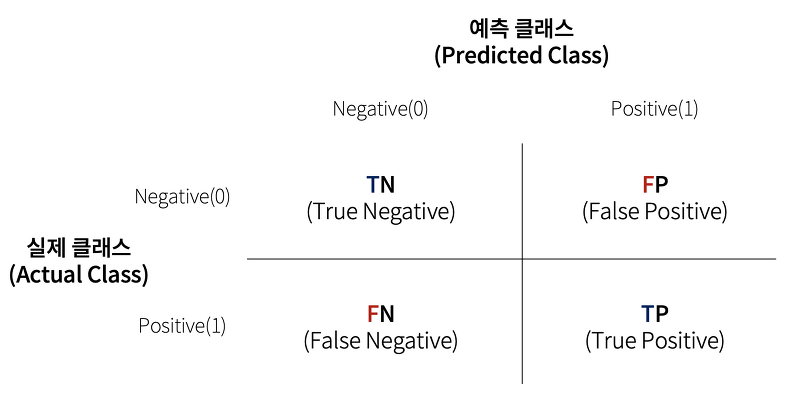

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_test, pred)

array([[103,  15],
       [ 15,  46]], dtype=int64)

## 정밀도와 재현율  
  
* 정밀도 = TP / (FP + TP) : True라고 예측한 값 중 실제 True 인 값의 비율  
* 재현율 = TP / (FN + TP) : 실제 정답이 True 인 값 중 True 인 값의 비율  
* 정밀도를 올리면 재현율은 떨어지고, 재현율을 올리면 정밀도는 떨어진다.  
-> 두 가지가 균형잡힌 수치가 좋다.  
-> eg. 정밀도 0.9, 재현율 0.1인 모델보다 / 정밀도 0.5, 재현율 0.5인 모델의 F1 Scroe가 좋다.  

In [62]:
# 오차행렬, 정확도, 정밀도, 재현율 print 함수 선언

def get_clf_eval(y_test, pred):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import confusion_matrix
    
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    print("==오차행렬==")
    print(confusion, '\n')
    print("==Score==")
    print(f"정확도 : {accuracy}, 정밀도 : {precision}, 재현율 : {recall}")
    

In [63]:
# 타이타닉 자료 간소화 함수

def format_features(data):
    from sklearn.preprocessing import LabelEncoder
    data['Cabin'] = data['Cabin'].str[:1]
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features :
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])
        print(le.classes_)
    return data

def drop_features(data):
    data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return data

def transform_features(data):
    import numpy as np
    data = fillna(data)
    data = drop_features(data)
    data = format_features(data)
    return data

def fillna(data):
    data['Age'].fillna(data['Age'].mean(), inplace = True)
    data['Cabin'].fillna('N', inplace = True)
    data['Embarked'].fillna('N', inplace = True)
    data['Fare'].fillna(0, inplace = True)
    return data

In [70]:
# 타이타닉 자료 불러오기
# 레이블(y)에 Survived (답안 : 생존여부)를 담아주고
# x 답안을 제외한 데이터를 학습/훈련 데이터셋으로 넘긴다.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("titanic.csv")
y = df['Survived']
X = df.drop(columns=['Survived'])
X = transform_features(X)

['female' 'male']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['C' 'N' 'Q' 'S']


In [65]:
# 트레이닝 자료, 테스트 자료 나누기

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=11)

In [66]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

==오차행렬==
[[108  10]
 [ 14  47]] 

==Score==
정확도 : 0.8659217877094972, 정밀도 : 0.8245614035087719, 재현율 : 0.7704918032786885


In [73]:
# 테스트값에 대한 결과값을 보자 (0=사망, 1=생존)
print(pred)

# 생존 확률값을 보여주는 함수 LogisticRegression.predict_proba(데이터)
print(lr_clf.predict_proba(X_test))
pred_proba = lr_clf.predict_proba(X_test)

[1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0
 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1]
[[0.44935225 0.55064775]
 [0.86335511 0.13664489]
 [0.86429643 0.13570357]
 [0.84968519 0.15031481]
 [0.82343409 0.17656591]
 [0.84231224 0.15768776]
 [0.87095489 0.12904511]
 [0.27228603 0.72771397]
 [0.78185128 0.21814872]
 [0.33185998 0.66814002]
 [0.86178763 0.13821237]
 [0.87058097 0.12941903]
 [0.8642595  0.1357405 ]
 [0.87065944 0.12934056]
 [0.56033544 0.43966456]
 [0.85003022 0.14996978]
 [0.88954172 0.11045828]
 [0.74250732 0.25749268]
 [0.71120224 0.28879776]
 [0.23776278 0.76223722]
 [0.75684107 0.24315893]
 [0.62428169 0.37571831]
 [0.84655246 0.15344754]
 [0.82711256 0.17288744]
 [0.86825628 0.13174372]
 [0.7700382

In [75]:
# 데이터 통합해서 생존 확률값과 실제 반환값(생존 1,0)을 보자
ttl = np.concatenate([pred.reshape(-1,1), pred_proba], axis=1)
ttl

array([[1.        , 0.44935225, 0.55064775],
       [0.        , 0.86335511, 0.13664489],
       [0.        , 0.86429643, 0.13570357],
       [0.        , 0.84968519, 0.15031481],
       [0.        , 0.82343409, 0.17656591],
       [0.        , 0.84231224, 0.15768776],
       [0.        , 0.87095489, 0.12904511],
       [1.        , 0.27228603, 0.72771397],
       [0.        , 0.78185128, 0.21814872],
       [1.        , 0.33185998, 0.66814002],
       [0.        , 0.86178763, 0.13821237],
       [0.        , 0.87058097, 0.12941903],
       [0.        , 0.8642595 , 0.1357405 ],
       [0.        , 0.87065944, 0.12934056],
       [0.        , 0.56033544, 0.43966456],
       [0.        , 0.85003022, 0.14996978],
       [0.        , 0.88954172, 0.11045828],
       [0.        , 0.74250732, 0.25749268],
       [0.        , 0.71120224, 0.28879776],
       [1.        , 0.23776278, 0.76223722],
       [0.        , 0.75684107, 0.24315893],
       [0.        , 0.62428169, 0.37571831],
       [0.

## 임계값 (Threshold)  

* threshold 값 이하는 0ㅇ로  
* threshold 값 초과는 1로 반환되게끔 하는 설정값  

In [78]:
from sklearn.preprocessing import Binarizer

### 임계값 간단 예시

In [82]:
# 간단한 데이터셋 만들기
X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

In [83]:
# binarizer 선언
# threshold는 1.1 로 선언했다.
binarizer = Binarizer(threshold=1.1)

# threshold의 값 = 1.1
# 1.1 이하는 0으로
# 1.1 초과는 1로 표기가 된다.


In [84]:
# X를 스레숄드를 적용해서 반환해보면?
binarizer.fit_transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

### 임계값 -> 타이타닉에 적용

In [93]:
from sklearn.preprocessing import Binarizer

# 스레숄드 선언
custom_threshold = 0.5
binarizer = Binarizer(threshold = custom_threshold)

# 타이타닉 생존률 값 가져오기
pred_proba1 = pred_proba[:,1].reshape(-1,1)
custom_predict = binarizer.fit_transform(pred_proba1)

In [94]:
# 오차행렬, 정확도, 정밀도, 재현율 가져오기 (임계값 = 0.5)
custom_threshold = 0.5
binarizer = Binarizer(threshold = custom_threshold)
custom_predict = binarizer.fit_transform(pred_proba1)

get_clf_eval(y_test, custom_predict)

==오차행렬==
[[108  10]
 [ 14  47]] 

==Score==
정확도 : 0.8659217877094972, 정밀도 : 0.8245614035087719, 재현율 : 0.7704918032786885


In [95]:
# 오차행렬, 정확도, 정밀도, 재현율 가져오기 (임계값 = 0.4)
# 정확도 떨어지고, 정밀도 떨어지고, 재현율 올라감
custom_threshold = 0.4
binarizer = Binarizer(threshold = custom_threshold)
custom_predict = binarizer.fit_transform(pred_proba1)

print(f"TN : {confusion[0][1]} TP : {confusion[2][2]} FP : {confusion[1][2]} FN : {confusion[1][2]}

get_clf_eval(y_test, custom_predict)

==오차행렬==
[[97 21]
 [11 50]] 

==Score==
정확도 : 0.8212290502793296, 정밀도 : 0.704225352112676, 재현율 : 0.819672131147541


In [96]:
# 오차행렬, 정확도, 정밀도, 재현율 가져오기 (임계값 = 0.6)
# 정확도 올라가고, 정밀도 올라가고, 재현율 떨어지고
custom_threshold = 0.6
binarizer = Binarizer(threshold = custom_threshold)
custom_predict = binarizer.fit_transform(pred_proba1)

get_clf_eval(y_test, custom_predict)

==오차행렬==
[[113   5]
 [ 17  44]] 

==Score==
정확도 : 0.8770949720670391, 정밀도 : 0.8979591836734694, 재현율 : 0.7213114754098361


### 여러 임계값일 때의 평가값 반환해보기 (for문 이용)

In [100]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold (y_test, pred_proba1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold)
        custom_predict = binarizer.fit_transform(pred_proba1)
        get_clf_eval(y_test, custom_predict)
        
        
get_eval_by_threshold(y_test, pred_proba1, thresholds)

==오차행렬==
[[97 21]
 [11 50]] 

==Score==
정확도 : 0.8212290502793296, 정밀도 : 0.704225352112676, 재현율 : 0.819672131147541
==오차행렬==
[[105  13]
 [ 13  48]] 

==Score==
정확도 : 0.8547486033519553, 정밀도 : 0.7868852459016393, 재현율 : 0.7868852459016393
==오차행렬==
[[108  10]
 [ 14  47]] 

==Score==
정확도 : 0.8659217877094972, 정밀도 : 0.8245614035087719, 재현율 : 0.7704918032786885
==오차행렬==
[[111   7]
 [ 16  45]] 

==Score==
정확도 : 0.8715083798882681, 정밀도 : 0.8653846153846154, 재현율 : 0.7377049180327869
==오차행렬==
[[113   5]
 [ 17  44]] 

==Score==
정확도 : 0.8770949720670391, 정밀도 : 0.8979591836734694, 재현율 : 0.7213114754098361


## 정밀도와 재현율 그래프

In [106]:
from sklearn.metrics import precision_recall_curve

In [112]:
# precision recall curve 만들기
print(precision_recall_curve(y_test, pred_proba1))

# recall curve의 각각의 대상을 변수에 담기
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba1)

(array([0.37888199, 0.375     , 0.37735849, 0.37974684, 0.38216561,
       0.37820513, 0.38064516, 0.38311688, 0.38562092, 0.38815789,
       0.39072848, 0.39597315, 0.40136054, 0.41843972, 0.42142857,
       0.42446043, 0.43065693, 0.43382353, 0.43703704, 0.44029851,
       0.44360902, 0.4469697 , 0.44615385, 0.4496124 , 0.4453125 ,
       0.44094488, 0.44444444, 0.44      , 0.44354839, 0.44715447,
       0.45454545, 0.45833333, 0.46218487, 0.46610169, 0.47008547,
       0.47413793, 0.47826087, 0.48245614, 0.48672566, 0.49107143,
       0.4954955 , 0.5       , 0.50458716, 0.50925926, 0.51401869,
       0.51886792, 0.52380952, 0.52884615, 0.53398058, 0.53921569,
       0.54455446, 0.55      , 0.55555556, 0.56122449, 0.56701031,
       0.57291667, 0.59139785, 0.59782609, 0.6043956 , 0.61111111,
       0.61797753, 0.625     , 0.63218391, 0.63953488, 0.64705882,
       0.64285714, 0.65060241, 0.65853659, 0.66666667, 0.675     ,
       0.6835443 , 0.69230769, 0.68831169, 0.68421053, 0.68  

In [113]:
# 각각의 변수들 크기 보기
precisions.shape, recalls.shape, thresholds.shape

((148,), (148,), (147,))

In [116]:
# 스레숄드 갯수를 15개로 나누기 (연속값을 -> 15단위로 잘라서 표로 보기 위한 준비)
thr_index = np.arange(0,thresholds.shape[0], 15)
thr_index

In [129]:
# 스레숄드 인덱스에 해당하는 값들 불러와 DF로 살펴보자

# 인덱스
thr_index = np.arange(0,thresholds.shape[0], 15)

# precision 정밀도 ( 소수점 3자리까지 )
np.round(precisions[thr_index], 3)

# recall 재현율 ( 소수점 3자리까지 )
np.round(recalls[thr_index], 3)

# DF 만들기
df = pd.DataFrame([thr_index, np.round(precisions[thr_index], 3), np.round(recalls[thr_index], 3)])
df

,0,15,30,45,60,75,90,105,120,135
,0.379,0.424,0.455,0.519,0.618,0.676,0.797,0.930,0.964,1.000
,1.000,0.967,0.902,0.902,0.902,0.820,0.770,0.656,0.443,0.213


In [145]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [146]:
# precision_recall_curve_plot 생성하는 함수 만들기

def precision_recall_curve_plot (y_test, pred_proba1):
    import matplotlib.pyplot as plt
    from sklearn.metrics import precision_recall_curve
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba1)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1) ,2))
    plt.xlabel('임계값')
    plt.ylabel('정밀도와 재현율')
    plt.legend()
    plt.grid()
    plt.show()


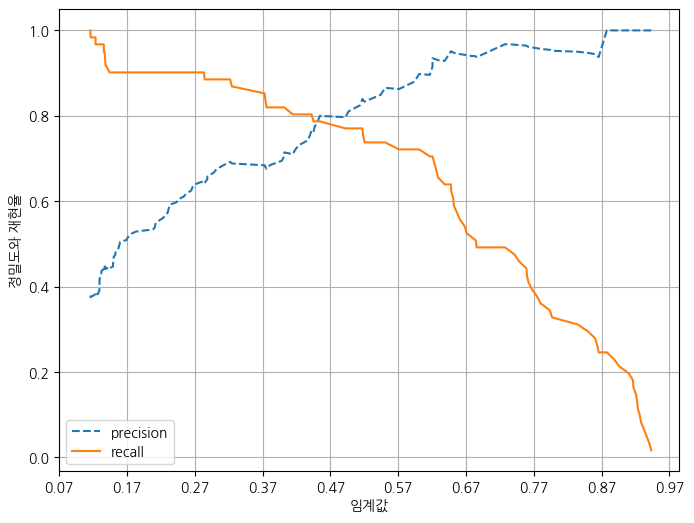

In [147]:
precision_recall_curve_plot(y_test, pred_proba1)
# 크로스 지점이 0.45 정도임 -> 이 곳이 가장 적절한 임계값


## F1 Score

In [148]:
from sklearn.metrics import f1_score

In [149]:
f1_score(y_test, pred)

0.7966101694915254

In [151]:
# F1 스코어 + 정확, 정밀, 재현율 점수 확인 함수
def get_clf_eval(y_test, pred):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import confusion_matrix
    
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    
    print("==오차행렬==")
    print(confusion, '\n')
    print("==Score==")
    print(f"정확도 : {accuracy}, 정밀도 : {precision}, 재현율 : {recall}, F1{f1:.4f}")
    
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

# 스레숄드에 따른 스코어들 보는 함수
def get_eval_by_threshold (y_test, pred_proba1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold)
        custom_predict = binarizer.fit_transform(pred_proba1)
        print(f'임계값 : {custom_threshold}')
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba1, thresholds) 

임계값 : 0.4
==오차행렬==
[[97 21]
 [11 50]] 

==Score==
정확도 : 0.8212290502793296, 정밀도 : 0.704225352112676, 재현율 : 0.819672131147541, F10.7576
임계값 : 0.45
==오차행렬==
[[105  13]
 [ 13  48]] 

==Score==
정확도 : 0.8547486033519553, 정밀도 : 0.7868852459016393, 재현율 : 0.7868852459016393, F10.7869
임계값 : 0.5
==오차행렬==
[[108  10]
 [ 14  47]] 

==Score==
정확도 : 0.8659217877094972, 정밀도 : 0.8245614035087719, 재현율 : 0.7704918032786885, F10.7966
임계값 : 0.55
==오차행렬==
[[111   7]
 [ 16  45]] 

==Score==
정확도 : 0.8715083798882681, 정밀도 : 0.8653846153846154, 재현율 : 0.7377049180327869, F10.7965
임계값 : 0.6
==오차행렬==
[[113   5]
 [ 17  44]] 

==Score==
정확도 : 0.8770949720670391, 정밀도 : 0.8979591836734694, 재현율 : 0.7213114754098361, F10.8000


## ROC CURVE

* ROC CURVE : 수신자 판단 곡선. 

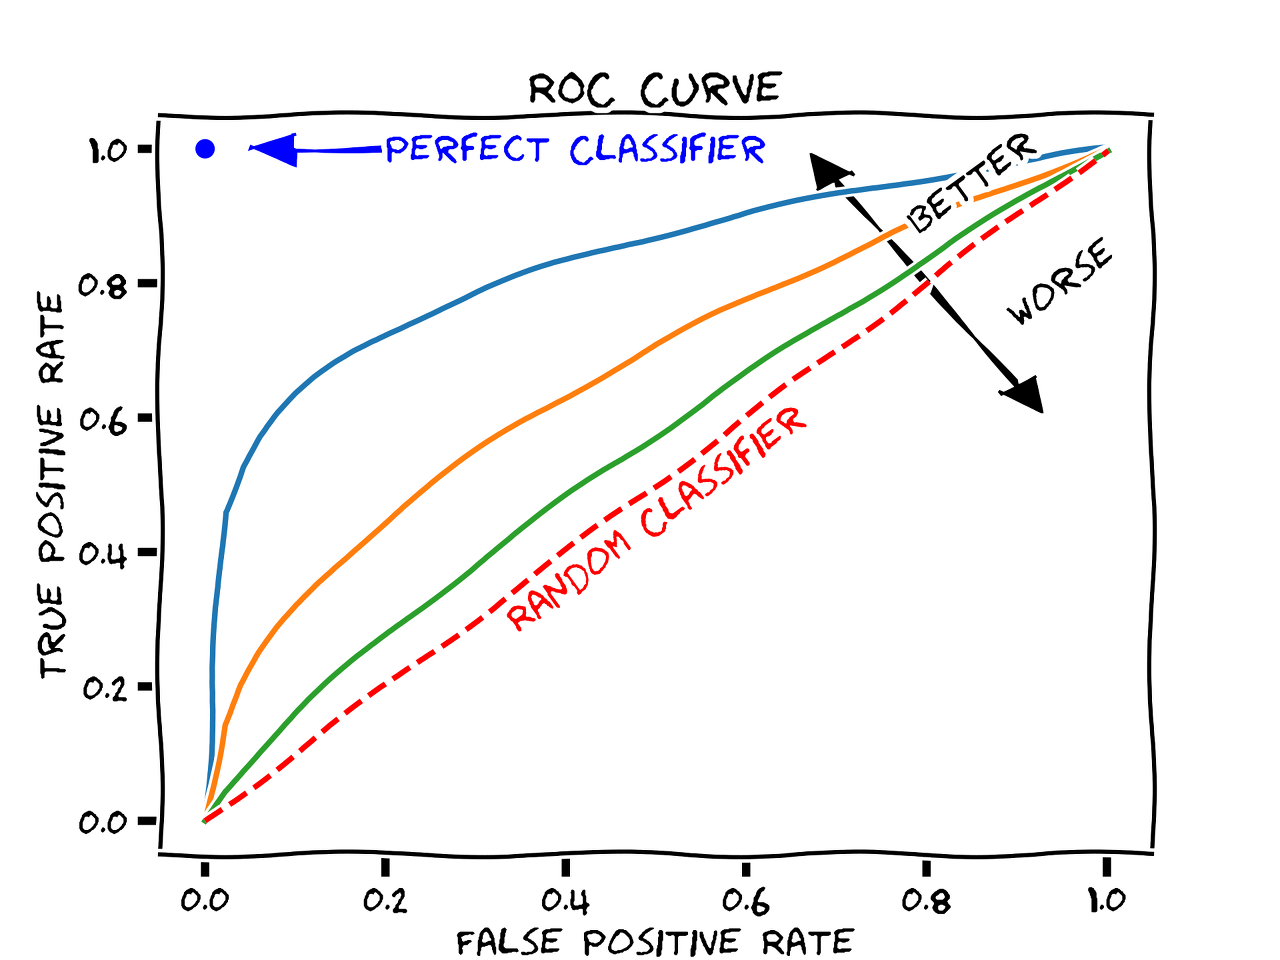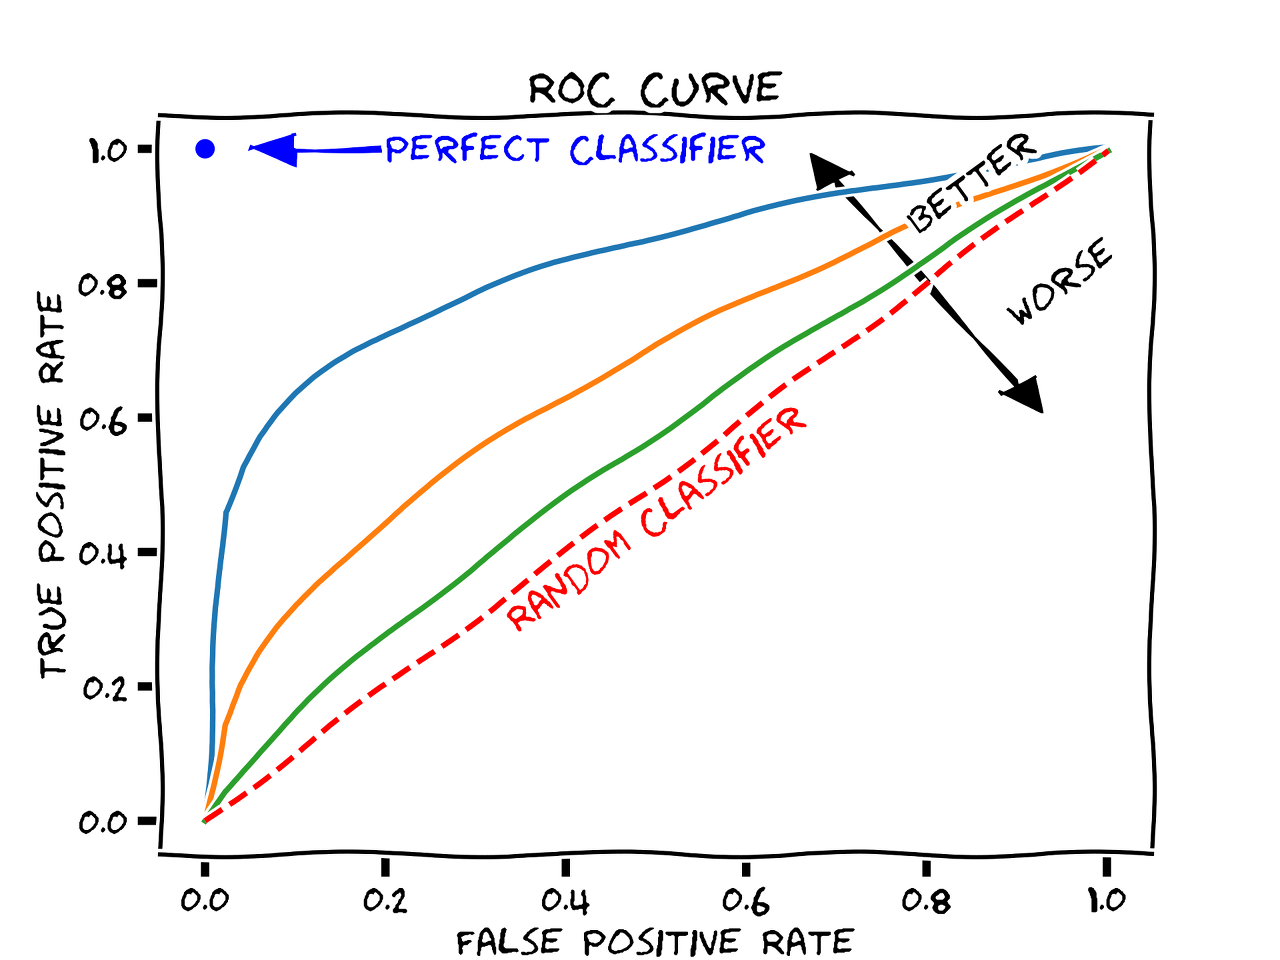

In [153]:
from sklearn.metrics import roc_curve

In [154]:
# ROC 커브
roc_curve(y_test, pred_proba1)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00847458, 0.00847458, 0.01694915, 0.01694915, 0.02542373,
        0.02542373, 0.02542373, 0.04237288, 0.04237288, 0.05932203,
        0.05932203, 0.07627119, 0.07627119, 0.10169492, 0.10169492,
        0.12711864, 0.12711864, 0.16949153, 0.16949153, 0.20338983,
        0.20338983, 0.25423729, 0.25423729, 0.3220339 , 0.34745763,
        0.55932203, 0.57627119, 0.59322034, 0.59322034, 0.60169492,
        0.60169492, 0.61016949, 0.61864407, 0.66101695, 0.6779661 ,
        0.69491525, 0.74576271, 0.77966102, 0.8220339 , 0.8220339 ,
        0.84745763, 0.84745763, 1.        ]),
 array([0.        , 0.01639344, 0.03278689, 0.06557377, 0.24590164,
        0.24590164, 0.49180328, 0.49180328, 0.63934426, 0.63934426,
        0.67213115, 0.70491803, 0.70491803, 0.72131148, 0.72131148,
        0.73770492, 0.73770492, 0.7704918 , 0.7704918 , 0.78688525,
        0.78688525, 0.80327869, 0.80327869, 0.81967213, 0.81967213,
  

In [155]:
# ROC 커브 그래프로 그리기 함수 선언

def roc_curve_plot(y_test, pred_proba1):
    from sklearn.metrics import roc_curve
    import matplotlib.pyplot as plt
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba1)
    plt.plot(fprs, tprs, label = 'ROC')
    plt.plot([0,1], [0,1], 'k--', label = 'Random')
    plt.legend()
    plt.show()


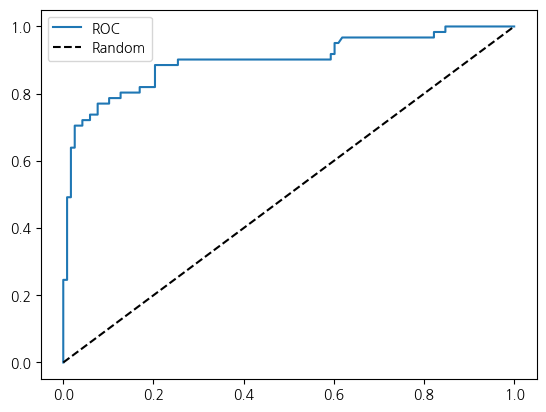

In [156]:
roc_curve_plot(y_test, pred_proba1)

## AUC 

In [157]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred_proba1)

0.8986524034454015

In [158]:
# AUC + F1, 정확, 정밀, 재현율 점수 확인 함수

def get_clf_eval(y_test, pred):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import confusion_matrix
    
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    auc = roc_auc_score(y_test, pred_proba1)
    
    print("==오차행렬==")
    print(confusion, '\n')
    print("==Score==")
    print(f"정확도 : {accuracy}, 정밀도 : {precision}, 재현율 : {recall}, F1 : {f1:.4f}, AUC : {auc:.4f}")
    
get_clf_eval(y_test, pred)

==오차행렬==
[[108  10]
 [ 14  47]] 

==Score==
정확도 : 0.8659217877094972, 정밀도 : 0.8245614035087719, 재현율 : 0.7704918032786885, F1 : 0.7966, AUC : 0.8987
